In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df= pd.read_csv('bank.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df1=df.copy()
df1.shape

(41188, 21)

In [9]:
df1.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df1.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

### Checking For Null Values & Duplicates

In [12]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df1.duplicated().sum()

12

In [14]:
df1.drop_duplicates(inplace=True)
df1.shape

(41176, 21)

In [15]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Univariate Data Analysis

### Numerical Columns

In [21]:
df1_num= df1.select_dtypes(include='number')

In [22]:
print(df1_num.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


#### Boxplots

In [39]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (200, 165))
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_num[variable], ax = subplot)

In [ ]:

# These columns have outliers age, duration, campaign, previous, cons.conf.idx

###  Histogram 

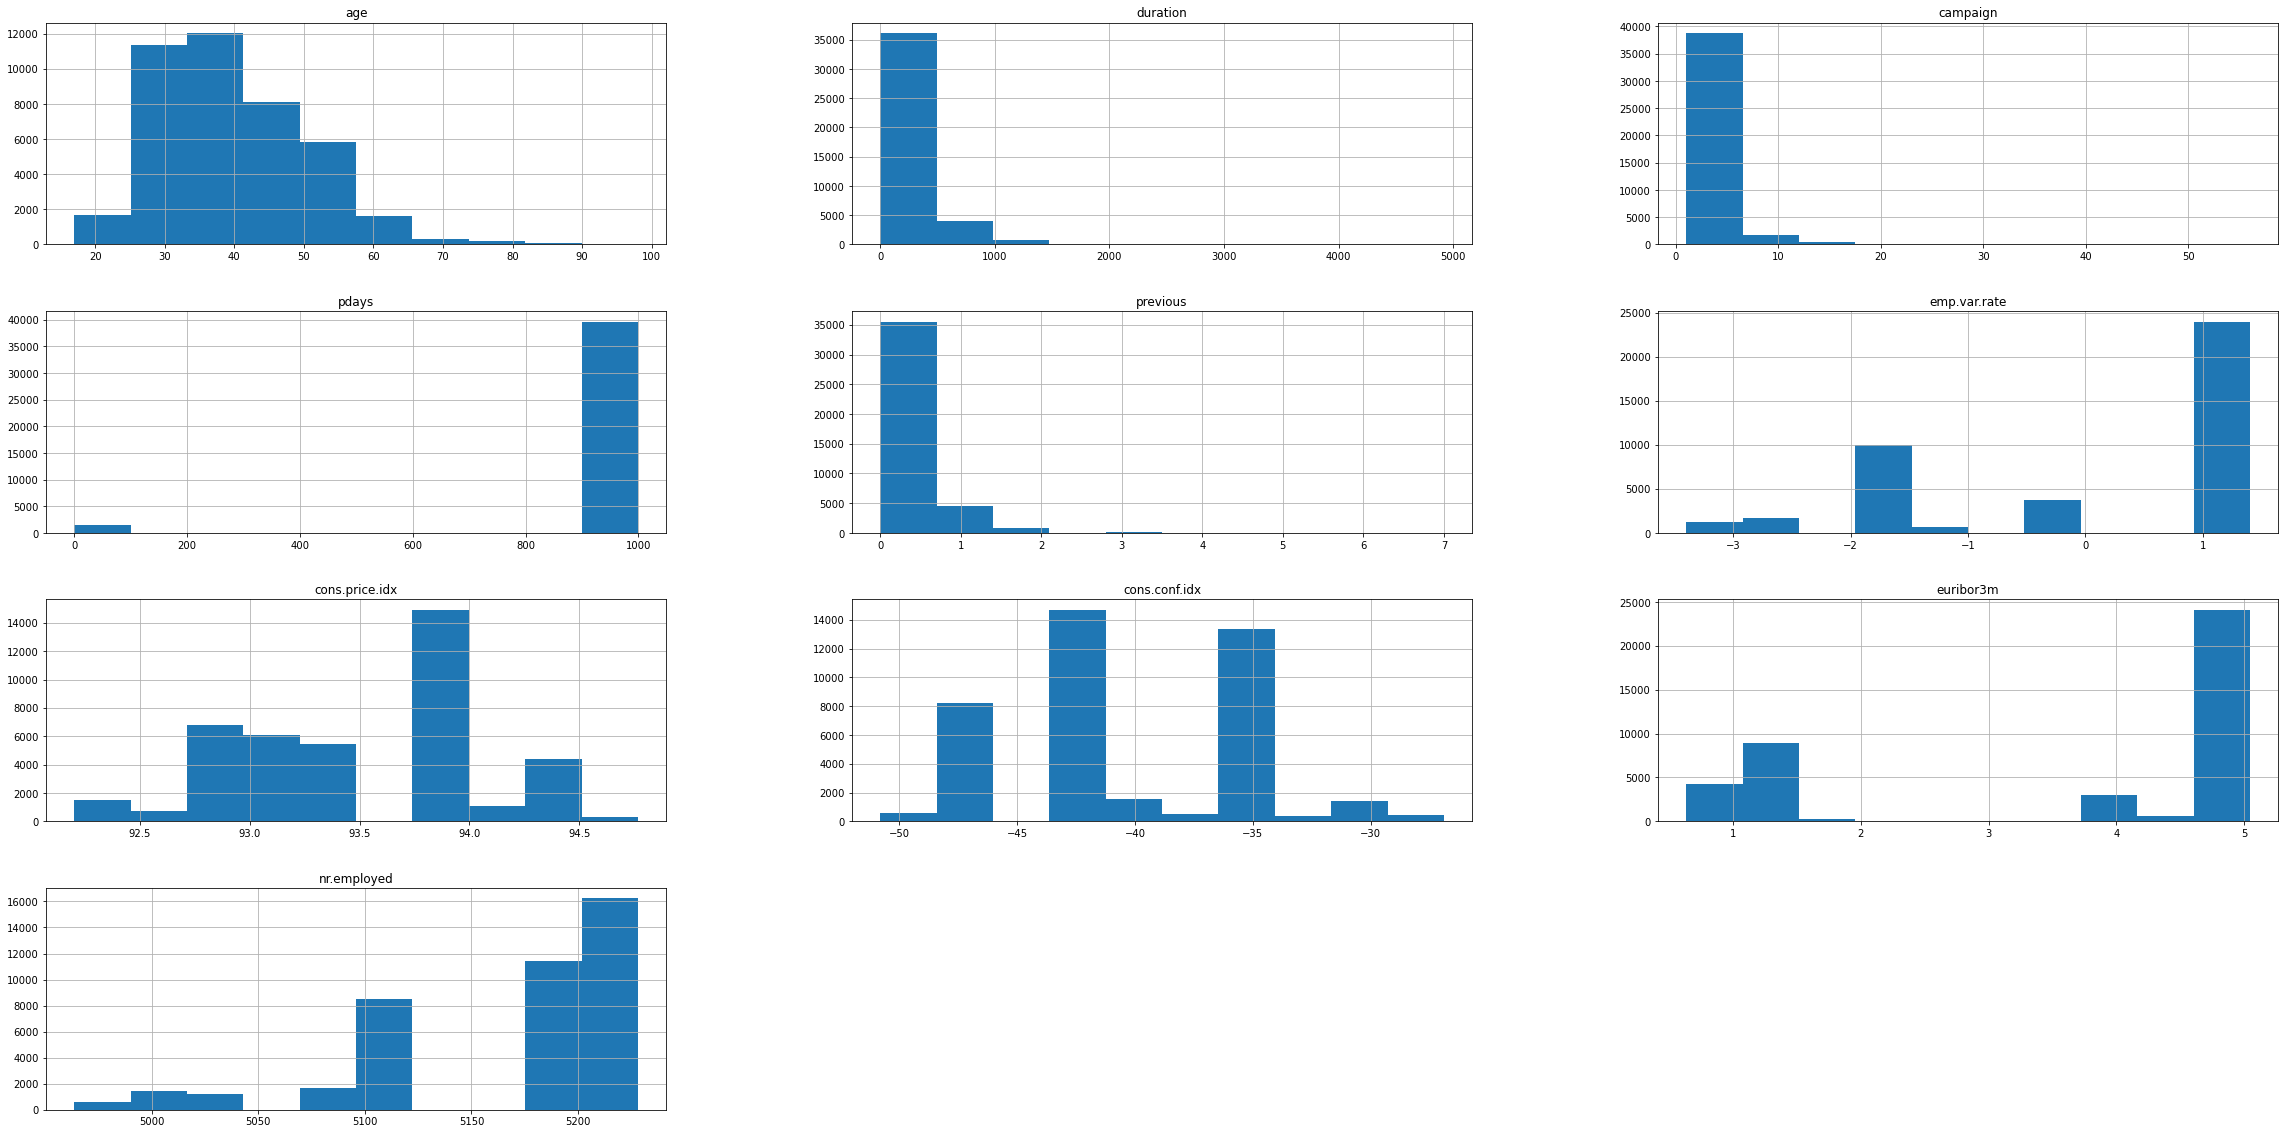

In [32]:
a=df1_numerical.hist(figsize=(40,20))

### Categorical columns

In [35]:
df1_cat= df1.select_dtypes(exclude='number')


In [36]:
print(df1_cat.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


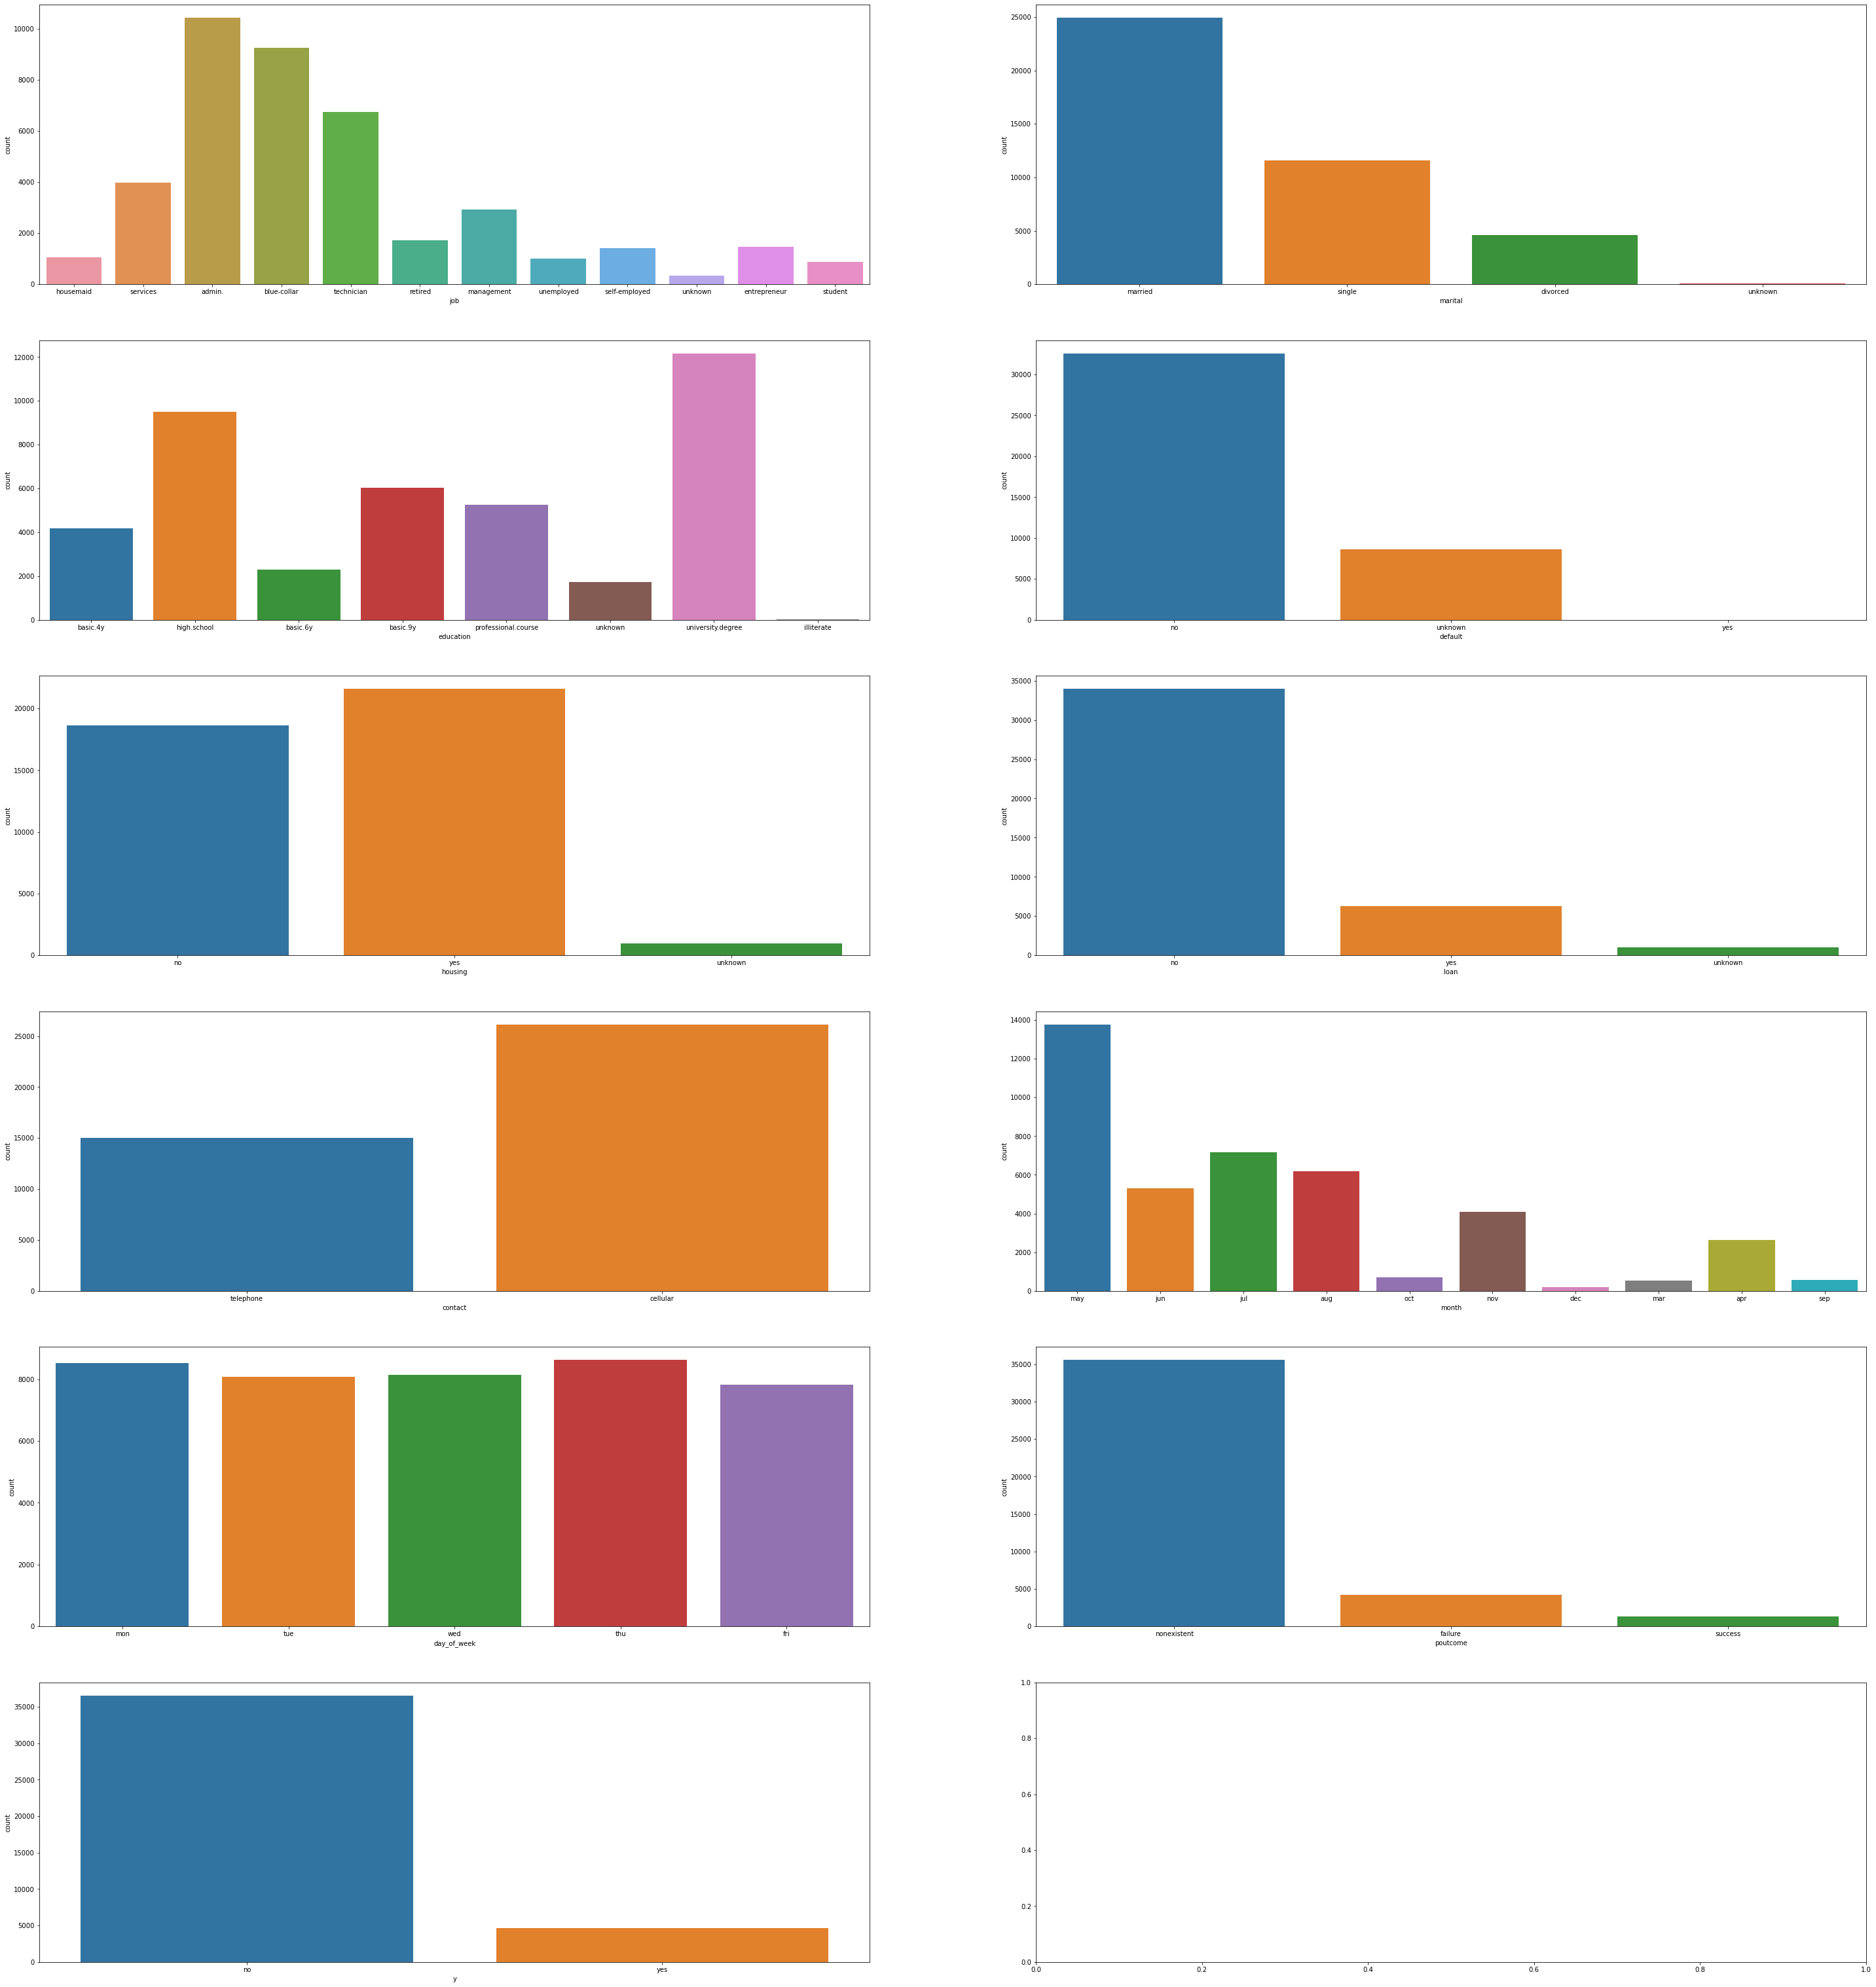

In [38]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize = (50, 55))

for variable, subplot in zip(df1_categorical, ax.flatten()):
    sns.countplot(df1_cat[variable], ax = subplot)

In [40]:
df1['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

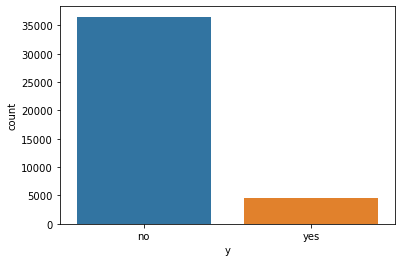

In [41]:
sns.countplot(x=df1['y'])
plt.show()

## Bivariate Analysis

### Distribution of y in categorical data

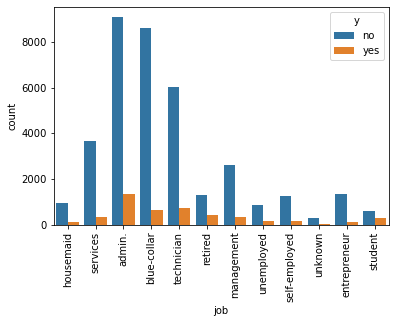

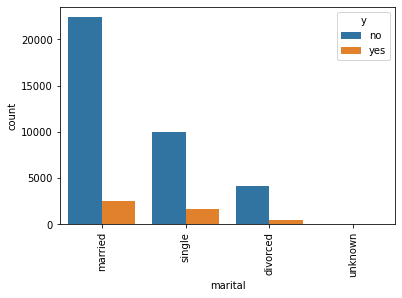

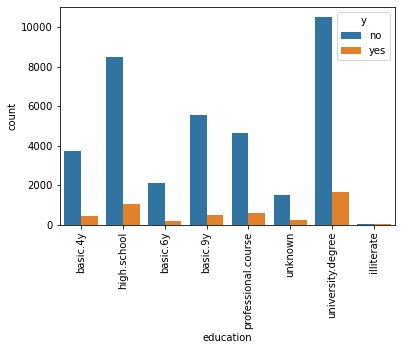

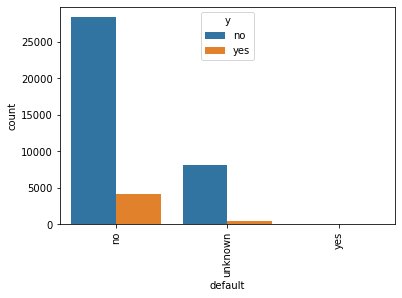

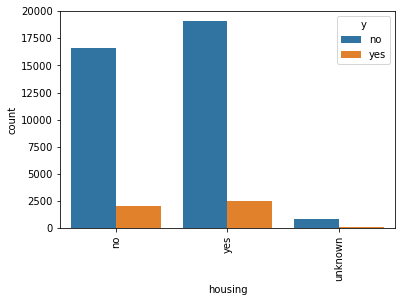

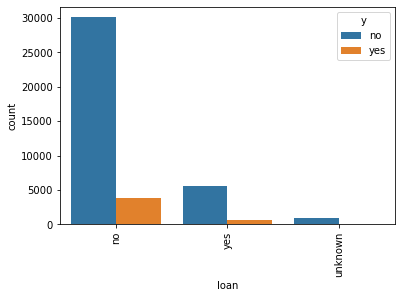

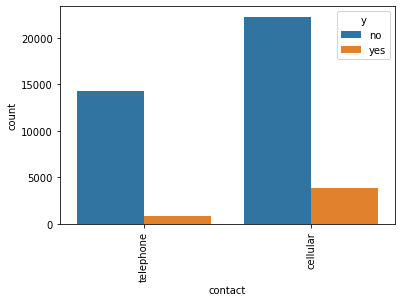

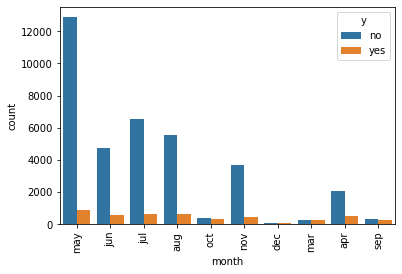

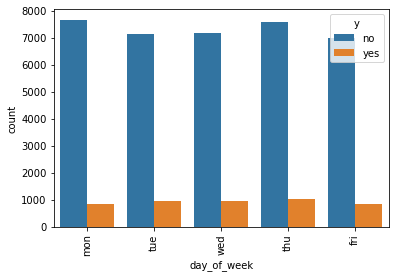

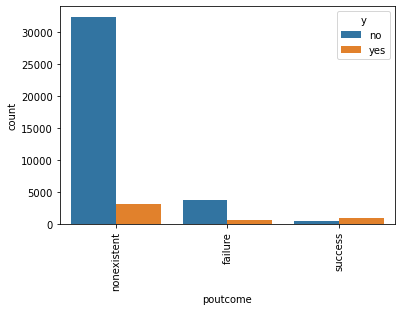

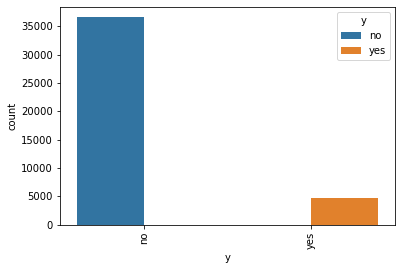

In [44]:
for i in df1_categorical:
    sns.countplot(x = df1[i], hue=df1['y'])
    plt.xticks(rotation=90)
    plt.show()

In [45]:
df1['education'] = df1['education'].replace(['basic.9y','basic.6y','basic.4y'],
                                          'basic')

In [46]:
df1['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

## Outlier Treatment

In [48]:
df1.describe(percentiles=[0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,38.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,180.000,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,93.749,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-41.800,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,4.857,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,5191.000,5228.100,5228.100


In [49]:
def outlier_handle(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [50]:
outlier_cols = ['age','duration','campaign','previous','cons.conf.idx']
df1[outlier_cols] = df1[outlier_cols].apply(outlier_handle)

In [52]:
df1.describe(percentiles=[0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
age,41176.0,39.976370,10.137591,23.000,23.000,38.000,71.0000,71.000
duration,41176.0,254.410652,235.211228,11.000,11.000,180.000,1271.0625,1271.250
campaign,41176.0,2.500291,2.301416,1.000,1.000,2.000,14.0000,14.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,999.000,999.0000,999.000
previous,41176.0,0.162449,0.433295,0.000,0.000,0.000,2.0000,2.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,1.100,1.4000,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,93.749,94.4650,94.767
cons.conf.idx,41176.0,-40.495398,4.612562,-49.500,-49.500,-41.800,-26.9000,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,4.857,4.9680,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,5191.000,5228.1000,5228.100


## Correlation

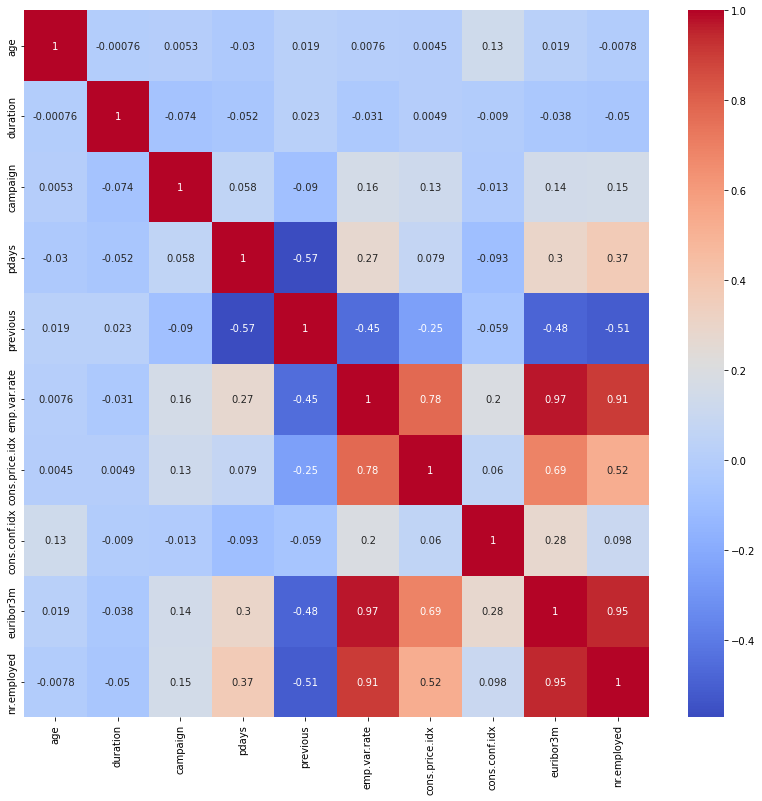

In [53]:
corr = df1.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [54]:
def high_corr(data, thresh):
    res = set()
    corr = df1.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >= thresh:
                res.add(corr.columns[i])
    return list(res)

multicoll_cols = high_corr(df1,0.7)
print(multicoll_cols)
print(len(multicoll_cols))

['nr.employed', 'euribor3m', 'cons.price.idx']
3


## Inference
These columns have multicollinearity :<br>
['nr.employed', 'euribor3m', 'cons.price.idx']

## Label encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lb = LabelEncoder()
for i in df1_categorical:
    df1[i] = lb.fit_transform(df1[i])

In [59]:
df1.dtypes.value_counts()

int64      12
float64     9
dtype: int64

### Removing Multicollinearity

In [60]:
df2=df1.copy()

In [61]:
df2.drop(['cons.price.idx', 'nr.employed', 'euribor3m'],axis=1,inplace=True)
print(len(df2.columns))
print(df2.columns)

18
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')


In [62]:
df2.dtypes.value_counts()

int64      12
float64     6
dtype: int64

## Models

In [63]:
x = df2.drop('y',axis=1)
y = df2['y']
print(x.shape)
print(y.shape)
print(x.columns)

(41176, 17)
(41176,)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx'],
      dtype='object')


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 17)
(10294, 17)
(30882,)
(10294,)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [66]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,color='blue')
    plt.plot([0,1],[0,1],label='TPR=FPR',linestyle=':',color='black')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=8)
    plt.grid()
    plt.show()

### Feature Selection

Training score 0.9427174405802733
Testing score 0.9105304060617836
Accuracy_Score 0.9105304060617836
Confusion Matrix
 [[8860  274]
 [ 647  513]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9134
           1       0.65      0.44      0.53      1160

    accuracy                           0.91     10294
   macro avg       0.79      0.71      0.74     10294
weighted avg       0.90      0.91      0.90     10294

AUC Score 0.9433060826166728


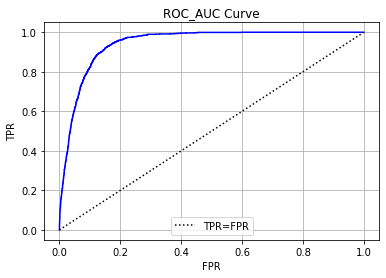

In [67]:
m1 = RandomForestClassifier(n_estimators=120,criterion='gini',
                            max_depth=12,min_samples_split=15)
gen_metrics(m1,x_train,x_test,y_train,y_test)

In [68]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_*100})
fimp_m1.sort_values('Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,40.370647
16,cons.conf.idx,10.461985
15,emp.var.rate,8.895414
14,poutcome,8.162695
12,pdays,8.113073
0,age,5.462893
8,month,4.458330
1,job,2.245731
11,campaign,2.013082
9,day_of_week,1.973749


In [69]:
df3=df2.copy()
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

In [70]:
df3.drop(['contact','marital','loan','housing','default'],axis=1,inplace=True)

In [71]:
df3.shape

(41176, 13)

### Standardize the data

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
mms = MinMaxScaler()
final_df = mms.fit_transform(df3)
final_df = pd.DataFrame(final_df, columns = df3.columns)

In [74]:
final_df.head(2)

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,0.687500,0.272727,0.0,0.666667,0.25,0.198373,0.0,1.0,0.0,0.5,0.9375,0.579646,0.0
1,0.708333,0.636364,0.2,0.666667,0.25,0.109502,0.0,1.0,0.0,0.5,0.9375,0.579646,0.0


## Building the Supervised Learning models

In [75]:
x = final_df.drop('y',axis=1)
y = final_df['y']
print(x.shape)
print(y.shape)
print(x.columns)

(41176, 12)
(41176,)
Index(['age', 'job', 'education', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.conf.idx'],
      dtype='object')


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 12)
(10294, 12)
(30882,)
(10294,)


### Handling unbalanced data using SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [80]:
from collections import Counter

In [81]:
c4 = Counter(y_sm)
print(c4)

Counter({0.0: 27403, 1.0: 27403})


In [82]:
print(x_sm.shape)
print(x_test.shape)
print(y_sm.shape)
print(y_test.shape)

(54806, 12)
(10294, 12)
(54806,)
(10294,)


# Tabulating the performance metrics of Models

## Logistic Regression

Training score 0.8583731708207131
Testing score 0.8479696910821838
Accuracy_Score 0.8479696910821838
Confusion Matrix
 [[7775 1359]
 [ 206  954]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      9134
         1.0       0.41      0.82      0.55      1160

    accuracy                           0.85     10294
   macro avg       0.69      0.84      0.73     10294
weighted avg       0.91      0.85      0.87     10294

AUC Score 0.920507642910535


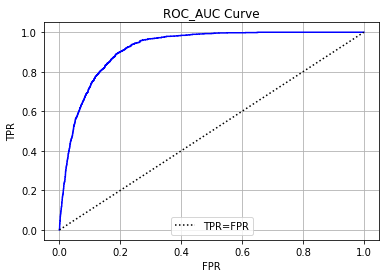

In [83]:
log_reg = LogisticRegression(max_iter=1000)
gen_metrics(log_reg,x_sm,x_test,y_sm,y_test)
y_pred_log_reg = log_reg.predict(x_test)

In [85]:
models = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy",'F-1 Score'])
models

,Model,Precision,Recall,Accuracy,F-1 Score


In [86]:
from sklearn import metrics

In [87]:
new_row = {"Model": "Logistic Regression",
            "Precision": metrics.precision_score(y_test,y_pred_log_reg), 
            "Recall": metrics.recall_score(y_test,y_pred_log_reg), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_log_reg), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_log_reg)}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score
0,Logistic Regression,0.412451,0.822414,0.84797,0.549381


## AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

Training score 0.950078458562931
Testing score 0.9006217213911016
Accuracy_Score 0.9006217213911016
Confusion Matrix
 [[8649  485]
 [ 538  622]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      9134
         1.0       0.56      0.54      0.55      1160

    accuracy                           0.90     10294
   macro avg       0.75      0.74      0.75     10294
weighted avg       0.90      0.90      0.90     10294

AUC Score 0.9340425220660964


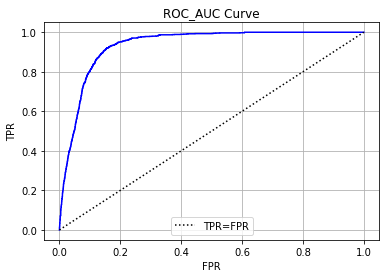

In [90]:
dt1 = DecisionTreeClassifier(max_depth=3)
ada= AdaBoostClassifier(dt1,n_estimators=60,learning_rate=1)
gen_metrics(ada,x_sm,x_test,y_sm,y_test)
y_pred_ada= ada.predict(x_test)

In [91]:
new_row = {"Model": "AdaBoost",
            "Precision": metrics.precision_score(y_test,y_pred_ada), 
            "Recall": metrics.recall_score(y_test,y_pred_ada), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_ada), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_ada)}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score
0,Logistic Regression,0.412451,0.822414,0.847970,0.549381
1,AdaBoost,0.561879,0.536207,0.900622,0.548743


### Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

#### Bernoulli

Training score 0.6547458307484582
Testing score 0.8109578395181659
Accuracy_Score 0.8109578395181659
Confusion Matrix
 [[7819 1315]
 [ 631  529]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      9134
         1.0       0.29      0.46      0.35      1160

    accuracy                           0.81     10294
   macro avg       0.61      0.66      0.62     10294
weighted avg       0.85      0.81      0.83     10294

AUC Score 0.6582835634952394


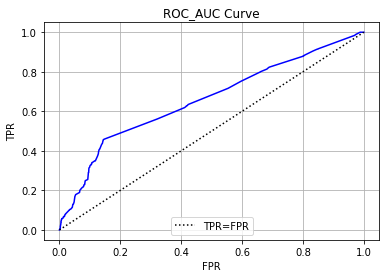

In [94]:
nbB=BernoulliNB()
gen_metrics(nbB,x_sm,x_test,y_sm,y_test)
y_pred_nbB= nbB.predict(x_test)

In [95]:
new_row = {"Model": "Naïve Bayes Bernoulli",
            "Precision": metrics.precision_score(y_test,y_pred_nbB), 
            "Recall": metrics.recall_score(y_test,y_pred_nbB), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_nbB), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_nbB)}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score
0,Logistic Regression,0.412451,0.822414,0.847970,0.549381
1,AdaBoost,0.561879,0.536207,0.900622,0.548743
2,Naïve Bayes Bernoulli,0.286876,0.456034,0.810958,0.352197


#### Multinomial

Training score 0.7644053570776922
Testing score 0.8212551000582864
Accuracy_Score 0.8212551000582864
Confusion Matrix
 [[7702 1432]
 [ 408  752]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      9134
         1.0       0.34      0.65      0.45      1160

    accuracy                           0.82     10294
   macro avg       0.65      0.75      0.67     10294
weighted avg       0.88      0.82      0.84     10294

AUC Score 0.8683495447097997


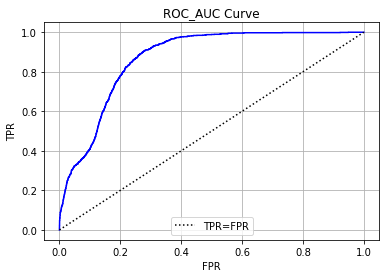

In [96]:
nbM=MultinomialNB()
gen_metrics(nbM,x_sm,x_test,y_sm,y_test)
y_pred_nbM= nbM.predict(x_test)

In [97]:
new_row = {"Model": "Naïve Bayes Multinomial",
            "Precision": metrics.precision_score(y_test,y_pred_nbM), 
            "Recall": metrics.recall_score(y_test,y_pred_nbM), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_nbM), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_nbM)}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score
0,Logistic Regression,0.412451,0.822414,0.847970,0.549381
1,AdaBoost,0.561879,0.536207,0.900622,0.548743
2,Naïve Bayes Bernoulli,0.286876,0.456034,0.810958,0.352197
3,Naïve Bayes Multinomial,0.344322,0.648276,0.821255,0.449761


#### Gaussian

Training score 0.7332773783892275
Testing score 0.8281523217408199
Accuracy_Score 0.8281523217408199
Confusion Matrix
 [[7876 1258]
 [ 511  649]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      9134
         1.0       0.34      0.56      0.42      1160

    accuracy                           0.83     10294
   macro avg       0.64      0.71      0.66     10294
weighted avg       0.87      0.83      0.85     10294

AUC Score 0.8694898465755079


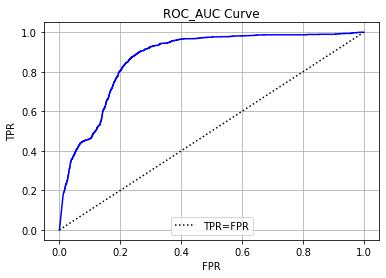

In [98]:
nbG= GaussianNB()
gen_metrics(nbG,x_sm,x_test,y_sm,y_test)
y_pred_nbG= nbG.predict(x_test)

In [99]:
new_row = {"Model": "Naïve Bayes Gaussian",
            "Precision": metrics.precision_score(y_test,y_pred_nbG), 
            "Recall": metrics.recall_score(y_test,y_pred_nbG), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_nbG), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_nbG)}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score
0,Logistic Regression,0.412451,0.822414,0.847970,0.549381
1,AdaBoost,0.561879,0.536207,0.900622,0.548743
2,Naïve Bayes Bernoulli,0.286876,0.456034,0.810958,0.352197
3,Naïve Bayes Multinomial,0.344322,0.648276,0.821255,0.449761
4,Naïve Bayes Gaussian,0.340325,0.559483,0.828152,0.423215


## KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

Training score 0.9493121191110462
Testing score 0.8640955896638819
Accuracy_Score 0.8640955896638819
Confusion Matrix
 [[8036 1098]
 [ 301  859]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      9134
         1.0       0.44      0.74      0.55      1160

    accuracy                           0.86     10294
   macro avg       0.70      0.81      0.74     10294
weighted avg       0.90      0.86      0.88     10294

AUC Score 0.8792744803424871


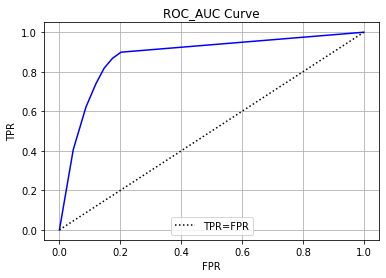

In [101]:
knn = KNeighborsClassifier(n_neighbors=6,p=2) 
gen_metrics(knn,x_sm,x_test,y_sm,y_test)
y_pred_knn= knn.predict(x_test)

In [102]:
new_row = {"Model": "KNN",
            "Precision": metrics.precision_score(y_test,y_pred_knn), 
            "Recall": metrics.recall_score(y_test,y_pred_knn), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_knn), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_knn)}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score
0,Logistic Regression,0.412451,0.822414,0.847970,0.549381
1,AdaBoost,0.561879,0.536207,0.900622,0.548743
2,Naïve Bayes Bernoulli,0.286876,0.456034,0.810958,0.352197
3,Naïve Bayes Multinomial,0.344322,0.648276,0.821255,0.449761
4,Naïve Bayes Gaussian,0.340325,0.559483,0.828152,0.423215
5,KNN,0.438937,0.740517,0.864096,0.551171


## SVM

In [105]:
from sklearn.svm import SVC

### Linear

In [ ]:
svc=SVC(kernel='linear',C=1,probability=True)
gen_metrics(svc,x_sm,x_test,y_sm,y_test)
y_pred_svc= svc.predict(x_test)

In [ ]:
svcp=SVC(kernel='poly',degree=3,probability=True)
gen_metrics(svcp,x_sm,x_test,y_sm,y_test)
y_pred_svcp= svcp.predict(x_test)

### Inference

AdaBoost performs better.